In [1]:
cd /home/dfried/projects/onecommon/aaai2020/annotation

/home/dfried/projects/onecommon/aaai2020/annotation


In [2]:
import json
from collections import Counter, defaultdict

In [3]:
!ls data/onecommon

ls: cannot access 'data/onecommon': No such file or directory


In [4]:
with open('aggregated_referent_annotation.json', 'r') as f:
    agg_referent_annotation = json.load(f)

In [31]:
with open('markable_annotation.json', 'r') as f:
    markable_annotation = json.load(f)

In [5]:
len(agg_referent_annotation)

5191

In [6]:
val = next(iter(agg_referent_annotation.values()))

In [7]:
val

{'M1': {'ambiguous': False,
  'avg_pairwise_f1': 1.0,
  'pairwise_entlevel_agreement': [21, 21],
  'pairwise_exact_match': [3, 3],
  'referents': ['agent_1_58'],
  'unidentifiable': False},
 'M2': {'ambiguous': False,
  'avg_pairwise_f1': 1.0,
  'pairwise_entlevel_agreement': [21, 21],
  'pairwise_exact_match': [3, 3],
  'referents': ['agent_0_2'],
  'unidentifiable': False},
 'M3': {'ambiguous': False,
  'avg_pairwise_f1': 1.0,
  'pairwise_entlevel_agreement': [21, 21],
  'pairwise_exact_match': [3, 3],
  'referents': ['agent_0_13',
   'agent_0_18',
   'agent_0_29',
   'agent_0_40',
   'agent_0_58',
   'agent_0_62'],
  'unidentifiable': False},
 'M4': {'ambiguous': False,
  'avg_pairwise_f1': 1.0,
  'pairwise_entlevel_agreement': [21, 21],
  'pairwise_exact_match': [3, 3],
  'referents': ['agent_1_2'],
  'unidentifiable': False}}

In [8]:
pdb on

Automatic pdb calling has been turned ON


In [9]:
from collections import Counter

In [10]:
disagreement_and_num = Counter()

In [11]:
pdb on

Automatic pdb calling has been turned ON


In [38]:
def display_disagreements(by_f1=False):
    pairwise_f1s = []
    tuples = []
    for chat_id, mentions in agg_referent_annotation.items():
        markables = markable_annotation[chat_id]['markables']
        for mention_key, mention in mentions.items():
            assert mention_key.startswith("M")
            mention_ix = int(mention_key[1:]) - 1
            markable_info = markables[mention_ix]
            if 'avg_pairwise_f1' in mention:
                pairwise_f1 = mention['avg_pairwise_f1']
                pairwise_f1s.append(pairwise_f1)
                disagreement = pairwise_f1 < 1.0
                num_refs = len(mention['referents'])
                disagreement_and_num[(disagreement, num_refs)] += 1
                if disagreement:
                    tuples.append((chat_id, mention_key, pairwise_f1, markable_info['text']))
    if by_f1:
        tuples = sorted(tuples, key=lambda t: t[2])
    for t in tuples:
        print("{} {:>3} {:.4f} {}".format(*t))

In [39]:
display_disagreements(by_f1=False)

C_0017671b0f484e3e961e890879c3bd8c  M5 0.3333 that one
C_0017671b0f484e3e961e890879c3bd8c  M6 0.3333 that one
C_002da2c8c33349d9bfe03d53890bd79c  M4 0.3333 a slightly small light gray dot
C_003ed06360084282b2ccfa512b0a6c2d  M8 0.6667 the line
C_00433f0f08c84d9abe5d59ac13697415 M10 0.3333 two dark circles
C_00433f0f08c84d9abe5d59ac13697415 M11 0.3333 One
C_00433f0f08c84d9abe5d59ac13697415 M12 0.3333 one
C_00433f0f08c84d9abe5d59ac13697415 M13 0.3333 The three of them
C_00577dca1c394f34a6dd03935b52a0b6  M4 0.3333 light small dot
C_005be0fe0fbf4d8996f1a37833e3fa2f M10 0.3333 a smaller one
C_005be0fe0fbf4d8996f1a37833e3fa2f  M6 0.0000 one
C_005be0fe0fbf4d8996f1a37833e3fa2f  M7 0.0000 its
C_005be0fe0fbf4d8996f1a37833e3fa2f  M8 0.0000 the other dot
C_005be0fe0fbf4d8996f1a37833e3fa2f  M9 0.3333 one of your larger dark gray dots
C_00b5ec739c2b480ab13ee4151821143d  M4 0.6000 that
C_00b9c6d6c59b4799941db73ec22d2360  M2 0.6667 two grey dots
C_01001d618bbe40a7b96365e65cd2ced3  M1 0.5000 four dots
C

C_56bbffed26fb4e34993aaa34aa0d4b5b  M3 0.7778 that small dark one
C_56bc8216b60e44f0b9f9d62ff017db92  M1 0.3333 One grey dot
C_56bc8216b60e44f0b9f9d62ff017db92 M10 0.8333 them
C_56bc8216b60e44f0b9f9d62ff017db92  M2 0.9394 rest
C_56bc8216b60e44f0b9f9d62ff017db92  M9 0.5556 Three
C_56c22023b4894a739d76ad548b4d0ed0  M1 0.2667 a lonely very dark large dot
C_56c22023b4894a739d76ad548b4d0ed0  M4 0.3333 the same one
C_56c22023b4894a739d76ad548b4d0ed0  M5 0.3333 it
C_56c22023b4894a739d76ad548b4d0ed0  M6 0.3333 it
C_56c5fb8e53374f2380372cec943d9aa8 M12 0.3333 Your biggest black dot
C_56c5fb8e53374f2380372cec943d9aa8 M13 0.3333 that one
C_56c5fb8e53374f2380372cec943d9aa8  M5 0.0000 a medium sized light grey dot
C_56c5fb8e53374f2380372cec943d9aa8  M6 0.2667 and some tiny grey dots
C_56d631a85d2d436b95a065514ec38664  M1 0.3333 a cluster of dots
C_56d631a85d2d436b95a065514ec38664  M4 0.3333 the others
C_56ef7c3472aa4e5dac467a6827cc9c3b  M1 0.3333 one large, medium gray dot
C_56ef7c3472aa4e5dac467a6

C_a39ddbbae804476292bf47c3ee2ec641  M6 0.7778 the darker one
C_a3a04642b66942bcbe6d1a1e0f13776d  M4 0.1481 their
C_a3b76de039b442aba61a67521b111221  M2 0.6667 the tiny dot
C_a3b76de039b442aba61a67521b111221  M5 0.3333 its
C_a3c10ecc7665429b917690344f89d5d8  M5 0.7778 it
C_a4002b0a648d45768ff8fd6265d278af  M1 0.3333 a medium gray tiny size dot
C_a4036811aa2a41c59386236434f6f45e  M4 0.2222 that
C_a440f0b2d7864852960af12825f235f7  M4 0.3333 Large medium grey dot
C_a440f0b2d7864852960af12825f235f7  M5 0.3333 smaller dot
C_a440f0b2d7864852960af12825f235f7  M6 0.3333 it
C_a44d48dc5f28474381aaf6c656265bf7  M2 0.9000 two dots
C_a44d48dc5f28474381aaf6c656265bf7  M4 0.3333 them
C_a44d48dc5f28474381aaf6c656265bf7  M7 0.5000 the small black dot
C_a4526453c6f34bfbad5d7afccf9c29ff  M2 0.3333 a slightly bigger light gray dot
C_a4906ec186504cc4b5b801541b23ff56 M13 0.3333 it
C_a4906ec186504cc4b5b801541b23ff56 M15 0.3333 that
C_a4906ec186504cc4b5b801541b23ff56  M7 0.3333 that one
C_a495310382bf4f8186953

In [40]:
display_disagreements(by_f1=True)

C_005be0fe0fbf4d8996f1a37833e3fa2f  M6 0.0000 one
C_005be0fe0fbf4d8996f1a37833e3fa2f  M7 0.0000 its
C_005be0fe0fbf4d8996f1a37833e3fa2f  M8 0.0000 the other dot
C_01e9fd07a84e4b61b49a95baba0c54e8  M3 0.0000 a small gray
C_0403baa7116c4c079d3e2bcf230e7610  M9 0.0000 the dark one
C_05374fb0f0b14516962bab887ff1a2b2  M2 0.0000 larger
C_05374fb0f0b14516962bab887ff1a2b2  M3 0.0000 smaller
C_053bb9b084fe457880186094f734a9fb M15 0.0000 the line
C_05a6927bff7344afa7d13b884b2ef7f3 M12 0.0000 that line
C_05a6927bff7344afa7d13b884b2ef7f3  M7 0.0000 a line
C_05a6927bff7344afa7d13b884b2ef7f3  M9 0.0000 that line
C_07451a04d05645d89295924c781ece17  M7 0.0000 the lighter dot
C_07451a04d05645d89295924c781ece17  M8 0.0000 that lighter dot
C_0959e8682d2747b8b69c8cd15ba5398f  M7 0.0000 the "triangle" dot
C_0959e8682d2747b8b69c8cd15ba5398f  M8 0.0000 its
C_0a4b867b9d8e40c1a8af405f889ff39d  M3 0.0000 same thing
C_0a4d2473add04eaeb374e389ed6329b3  M4 0.0000 it
C_0b2b247e772d4ae1bc24045dc00771cb  M9 0.0000 one

C_8c3a6e11c070454abcb8d3769fc6914a M12 0.3333 the line of 3
C_8c3a6e11c070454abcb8d3769fc6914a M13 0.3333 the darkest dot
C_8c6cfd2709aa4e1badd9b1afabf6ee10  M1 0.3333 only one dark gray dot
C_8c7a3763fd8e44b99f5b7ff659b59e5b  M2 0.3333 itself
C_8c8f50374dab456dae2c15c9a88e2d93  M6 0.3333 yours
C_8c9a6906fa7046099c56f36e8b258cce  M4 0.3333 a large light grey dot
C_8c9a6906fa7046099c56f36e8b258cce  M5 0.3333 itself
C_8cd53d67e1084e91bf202b82246cfa9e  M4 0.3333 a lighter gray dot
C_8cdf39450f034398ad01c521b8bd605e  M2 0.3333 rightmost
C_8d08bd6410a64782bb8cf88e7d5cb24c M13 0.3333 its
C_8d08bd6410a64782bb8cf88e7d5cb24c  M9 0.3333 one
C_8d131661a48642178e35a2e42e6b2b63  M3 0.3333 a slightly lighter smaller one
C_8d131661a48642178e35a2e42e6b2b63  M4 0.3333 its
C_8d14f69d08d04c11bc0c84227d7e8dfa  M2 0.3333 a black dot
C_8d14f69d08d04c11bc0c84227d7e8dfa  M3 0.3333 a slightly smaller black dot
C_8d14f69d08d04c11bc0c84227d7e8dfa  M4 0.3333 its
C_8d2f6b456fe5479280d98ffbf552562a  M8 0.3333 a sma

C_41ff80363fac4a82af482fd4aa59c2c9  M3 0.6667 them
C_42b824374af745f5bc9ccd6421b5aafb  M3 0.6667 one very tiny dark dot
C_42b824374af745f5bc9ccd6421b5aafb  M4 0.6667 it
C_435a6f39cca64e3c820e1faf1da1f0dd M10 0.6667 other 2
C_435a6f39cca64e3c820e1faf1da1f0dd M11 0.6667 the same one
C_439e51de724548dfa59d221181e15ea9 M13 0.6667 it
C_443d22a6c9f24b7b935ad39ab11234c5  M2 0.6667 Lonely grey dot
C_443d22a6c9f24b7b935ad39ab11234c5  M3 0.6667 little one
C_474ed9ce85d84aba85431e71ae83b79e M14 0.6667 the one
C_47a707f63d6e4bd3bb24f8d2700b0bcb  M2 0.6667 a diagonal line of two medium dots
C_4839119531544ac5ae212f5f40cc811d  M4 0.6667 four dots
C_492a4d5a0195493b8f8ee4f0fbe5ab8d  M1 0.6667 2 large light grey dot
C_492a4d5a0195493b8f8ee4f0fbe5ab8d  M2 0.6667 each other
C_4a36555ab4e3401790bd0fa7a5ca6a06  M5 0.6667 a pair of grey
C_4ab1341377f44d049e4a28bb52d90bf8  M3 0.6667 most of them
C_4ab1341377f44d049e4a28bb52d90bf8  M5 0.6667 the smaller ones
C_4aceb82885354d379778c70d6ec9b451  M2 0.6667 my s

In [41]:
import matplotlib.pyplot as plt

In [42]:
%matplotlib inline

(array([4.470e+02, 5.000e+00, 2.700e+01, 8.700e+01, 1.380e+02, 4.100e+01,
        3.538e+03, 2.300e+01, 1.260e+02, 1.700e+01, 1.710e+02, 1.400e+02,
        3.300e+01, 5.190e+02, 4.900e+01, 1.151e+03, 1.220e+02, 1.970e+02,
        1.750e+02, 3.185e+04]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

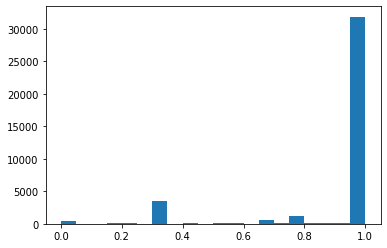

In [43]:
plt.hist(pairwise_f1s, bins=20)

In [44]:
len([p for p in pairwise_f1s if p < 1.0])

7008

In [45]:
max([p for p in pairwise_f1s if p < 1.0])

0.9545454545454546

In [46]:
len(pairwise_f1s)

38856

(array([ 452.,  112.,  178., 3552.,  142.,  253.,  619.,   75., 1251.,
         374.]),
 array([0.        , 0.09545455, 0.19090909, 0.28636364, 0.38181818,
        0.47727273, 0.57272727, 0.66818182, 0.76363636, 0.85909091,
        0.95454545]),
 <a list of 10 Patch objects>)

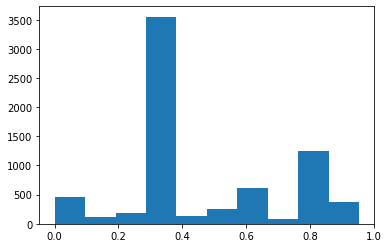

In [47]:
plt.hist([p for p in pairwise_f1s if p < 1.0])

In [48]:
pdb on

Automatic pdb calling has been turned ON


In [49]:
ambiguous = Counter()
unidentifiable = Counter()
problem_annotations = set()
for a_key, annotation in agg_referent_annotation.items():
    for mention in annotation.values():
        if 'ambiguous' not in mention:
            problem_annotations.add(a_key)
        else:
            ambiguous[mention['ambiguous']] += 1
        if 'unidentifiable' not in mention:
            problem_annotations.add(a_key)
        else:
            unidentifiable[mention['unidentifiable']] += 1

In [50]:
len(problem_annotations)

1029

In [51]:
ambiguous

Counter({False: 38461, True: 395})

In [52]:
unidentifiable

Counter({False: 38747, True: 109})

In [53]:
ambiguous[True] / sum(ambiguous.values())

0.010165740168828496

In [54]:
unidentifiable[True] / sum(unidentifiable.values())

0.0028052295655754582

In [55]:
with open('../annotation/referent_annotation.json', 'r') as f:
    referent_annotation = json.load(f)

In [56]:
next(iter(referent_annotation.values()))

{'MT_A22DDO8NILSX6O': {'M1': {'ambiguous': False,
   'assignment_id': '3TEM0PF1Q5Y01WK1GWSHTV45GI8D0P',
   'referents': ['agent_1_58'],
   'unidentifiable': False},
  'M2': {'ambiguous': False,
   'assignment_id': '3TEM0PF1Q5Y01WK1GWSHTV45GI8D0P',
   'referents': ['agent_0_2'],
   'unidentifiable': False},
  'M3': {'ambiguous': False,
   'assignment_id': '3TEM0PF1Q5Y01WK1GWSHTV45GI8D0P',
   'referents': ['agent_0_29',
    'agent_0_13',
    'agent_0_62',
    'agent_0_40',
    'agent_0_58',
    'agent_0_18'],
   'unidentifiable': False},
  'M4': {'ambiguous': False,
   'assignment_id': '3TEM0PF1Q5Y01WK1GWSHTV45GI8D0P',
   'referents': ['agent_1_2'],
   'unidentifiable': False}},
 'MT_A27SMEOPKV84VI': {'M1': {'ambiguous': False,
   'assignment_id': '3QILPRALQ5WR5XGH0UJZIFMHDKM8NP',
   'referents': ['agent_1_58'],
   'unidentifiable': False},
  'M2': {'ambiguous': False,
   'assignment_id': '3QILPRALQ5WR5XGH0UJZIFMHDKM8NP',
   'referents': ['agent_0_2'],
   'unidentifiable': False},
  'M3'